In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters
%matplotlib inline

import hphc

In [2]:
outdir = 'outdir_new_model'
label = 'create_your_own_source_model'
sampling_frequency = 4096
duration = 4

In [3]:
# Here we define our source model - this is the sine-Gaussian model in the
# frequency domain.
def eccentric_waveform(frequency_array, mass_1, mass_2, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time):
    '''
    freq = []
    for ii in range(len(frequency_array)):
        if frequency_array[ii]>=10. :
            freq = np.append(freq, frequency_array[ii])
    '''       
    h_plus = []
    h_cross = []
    
    for f in frequency_array:
        if f<10.0:
            h_plus = np.append(h_plus,0*1j)
            h_cross = np.append(h_cross,0*1j)
        else:
            arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , 'm1_':mass_1, 'm2_':mass_2, 'f_':f, 'f0_':10., 'Fp_':1., 'Fc_':0., 'et0_':eccentricity, 'phic_':phase, 'tc_':geocent_time}

            arg_cross = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , 'm1_':mass_1, 'm2_':mass_2, 'f_':f, 'f0_':10., 'Fp_':0., 'Fc_':1., 'et0_':eccentricity, 'phic_':phase, 'tc_':geocent_time}

            fplus = hphc.Fn(**arg_plus)
            h_plus = np.append(h_plus,fplus.htilde())

            fcross = hphc.Fn(**arg_cross)
            h_cross = np.append(h_cross,fcross.htilde())

    return {'plus': h_plus, 'cross': h_cross}

In [4]:
#arg_plus = {'iota_':np.pi/3, 'beta_':np.pi/3, 'D_':100. , 'm1_':10., 'm2_':10., 'f_':0., 'f0_':10., 'Fp_':1.0, 'Fc_':0.0, 'et0_':0.1, 'phic_':0., 'tc_':0.}
#fplus = hphc.Fn(**arg_plus)
#fplus.eccn()

In [5]:
#frequency = np.arange(10,200,1)
#eccentric_waveform([500], 10.0,10.0,100.0,np.pi/3,np.pi/3,0.0,0.0)['plus']

In [6]:
#plt.loglog(frequency, abs(hp_))

In [4]:
# We now define some parameters that we will inject
 injection_parameters = dict(mass_1=10.0, mass_2=10.0, eccentricity=0.8, luminosity_distance=100.0, theta_jn=np.pi/3, psi=np.pi/3, phase=1.2, geocent_time=1180002601.0, ra=1.375, dec=-1.2108)

In [5]:
# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

09:17 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
# Set up interferometers.
minimum_frequency = 10.
maximum_frequency = 200.

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
09:18 bilby INFO    : Injected signal in H1:
09:18 bilby INFO    :   optimal SNR = 96.65
09:18 bilby INFO    :   matched filter SNR = 98.36+0.73j
09:18 bilby INFO    :   mass_1 = 10.0
09:18 bilby INFO    :   mass_2 = 10.0
09:18 bilby INFO    :   eccentricity = 0.8
09:18 bilby INFO    :   luminosity_distance = 100.0
09:18 bilby INFO    :   theta_jn = 1.0471975511965976
09:18 bilby INFO    :   psi = 1.0471975511965976
09:18 bilby INFO    :   phase = 1.2
09:18 bilby INFO    :   geocent_time = 1180002601.0
09:18 bilby INFO    :   ra = 1.375
09:18 bilby INFO    :   dec = -1.2108
09:18 bilby INFO    : Injected signal in L1:
09:18 bilby INFO    :   optimal SNR = 76.37
09:18 bilby INFO    :   matched filter SNR = 75.87-0.54j
09:

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

09:20 bilby INFO    : Injected signal in H1:
09:20 bilby INFO    :   optimal SNR = 96.65
09:20 bilby INFO    :   matched filter SNR = 388.30+0.73j
09:20 bilby INFO    :   mass_1 = 10.0
09:20 bilby INFO    :   mass_2 = 10.0
09:20 bilby INFO    :   eccentricity = 0.8
09:20 bilby INFO    :   luminosity_distance = 100.0
09:20 bilby INFO    :   theta_jn = 1.0471975511965976
09:20 bilby INFO    :   psi = 1.0471975511965976
09:20 bilby INFO    :   phase = 1.2
09:20 bilby INFO    :   geocent_time = 1180002601.0
09:20 bilby INFO    :   ra = 1.375
09:20 bilby INFO    :   dec = -1.2108
09:20 bilby INFO    : Injected signal in L1:
09:20 bilby INFO    :   optimal SNR = 76.37
09:20 bilby INFO    :   matched filter SNR = 304.99-0.54j
09:20 bilby INFO    :   mass_1 = 10.0
09:20 bilby INFO    :   mass_2 = 10.0
09:20 bilby INFO    :   eccentricity = 0.8
09:20 bilby INFO    :   luminosity_distance = 100.0
09:20 bilby INFO    :   theta_jn = 1.0471975511965976
09:20 bilby INFO    :   psi = 1.04719755119659

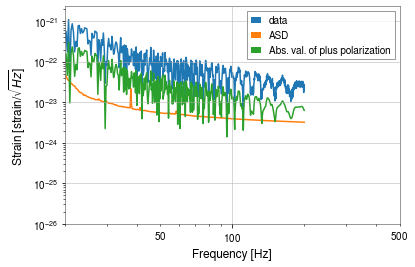

In [9]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(20,500)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [11]:
prior = bilby.core.prior.PriorDict()
prior['mass_1'] = 10.
prior['mass_2'] = 10.
prior['phase'] = 1.2
prior['geocent_time'] = 1180002601.0
prior['dec'] =  -1.2108
prior['ra'] =  1.375
prior['theta_jn'] =  np.pi/3
prior['psi'] =  np.pi/3
prior['luminosity_distance'] = 100.
prior["eccentricity"] = bilby.core.prior.LogUniform(minimum=1e-4, maximum=0.1, name='eccentricity')


In [12]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

In [ ]:
result = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    resume=False, sample='unif', injection_parameters=injection_parameters)


09:09 bilby INFO    : Running for label 'create_your_own_source_model', output will be saved to 'outdir_new_model'
09:09 bilby INFO    : Using lal version 7.0.0
09:09 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
09:09 bilby INFO    : Using lalsimulation version 2.2.0
09:09 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
09:09 bilby INFO    : Search parameters:
09:09 bilby INFO    :   eccentricity = LogUniform(minimum=0.0001, maximum=0.1, name='eccentricity', latex_label='eccentricity', unit=None, boundary=None)
09:09 bilby INFO    :   mass_1 = 10.0
09:09 bilby INFO    :   mass_2 = 10.0
09:09 bilby INFO    :   phase = 1.2
09:09 bilby INFO    :   geocent_time = 1180002601.0
09:09 bilby INFO  

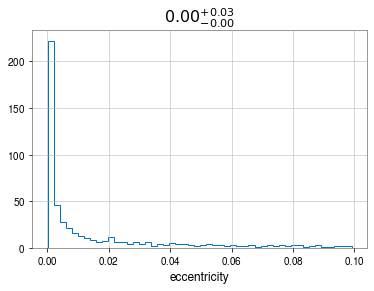

In [16]:
result.plot_corner()

(array([605., 149.,  74.,  45.,  47.,  33.,  28.,  28.,  25.,
         14.,  20.,  16.,  14.,  14.,  10.,   4.,  14.,   9.,
         11.,  11.,  12.,   4.,   7.,  11.,  11.,   6.,   9.,
          6.,   5.,   5.,   7.,   6.,  11.,   7.,   2.,   8.,
          4.,   1.,   3.,   3.,   6.,   8.,   5.,   1.,   6.,
          3.,   8.,   7.,   8.,   3.]),
 array([0.00010008, 0.00209104, 0.004082  , 0.00607296,
        0.00806393, 0.01005489, 0.01204585, 0.01403681,
        0.01602777, 0.01801873, 0.02000969, 0.02200065,
        0.02399161, 0.02598257, 0.02797353, 0.02996449,
        0.03195545, 0.03394641, 0.03593737, 0.03792833,
        0.03991929, 0.04191025, 0.04390121, 0.04589217,
        0.04788313, 0.04987409, 0.05186505, 0.05385601,
        0.05584697, 0.05783793, 0.05982889, 0.06181985,
        0.06381081, 0.06580177, 0.06779273, 0.06978369,
        0.07177465, 0.07376561, 0.07575658, 0.07774754,
        0.0797385 , 0.08172946, 0.08372042, 0.08571138,
        0.08770234, 0.0896933 , 0.

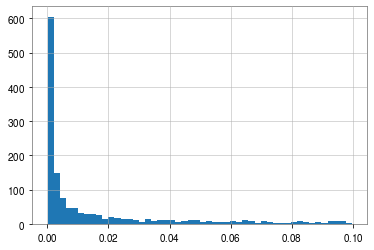

In [19]:
plt.hist(result.samples[2000:], bins=50)

In [16]:
len(result.samples)

2354